# Regression Case Study: YouTube Video Views Prediction

Problem Statement: Predict how much view can a video get
* Target Variable: views
* Predictor Variables: comments, likes, dislikes etc.

## Exploring the data

In [112]:
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [128]:
data=pd.read_csv(R"C:\Users\ADMIN\Downloads\youtube_data.csv")

In [129]:
print('Shape before deleting duplicate values:', data.shape)

Shape before deleting duplicate values: (234889, 29)


In [130]:
# Checking duplicates rows and Removing duplicate rows if any
print(data.duplicated().value_counts())
data.drop_duplicates(inplace = True)
print('Shape After deleting duplicate values:', data.shape)

False    234889
Name: count, dtype: int64
Shape After deleting duplicate values: (234889, 29)


In [131]:
data.head() # Start observing the Quantitative/Categorical/Qualitative variables

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,averageViewDuration,averageViewPercentage,annotationClickThroughRate,annotationCloseRate,annotationImpressions,annotationClickableImpressions,annotationClosableImpressions,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.0,0.0,1208.0,32.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,0.0,509.0,13.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,235.0,0.0,2351.0,64.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,3495.0,95.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,3629.0,99.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
pd.set_option("display.max_columns",None)

In [133]:
data.head()

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,averageViewDuration,averageViewPercentage,annotationClickThroughRate,annotationCloseRate,annotationImpressions,annotationClickableImpressions,annotationClosableImpressions,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.0,0.0,1208.0,32.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,0.0,509.0,13.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,235.0,0.0,2351.0,64.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,3495.0,95.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,3629.0,99.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        234889 non-null  object 
 1   day                             234889 non-null  object 
 2   views                           234889 non-null  float64
 3   redViews                        234889 non-null  float64
 4   comments                        234889 non-null  float64
 5   likes                           234889 non-null  float64
 6   dislikes                        234889 non-null  float64
 7   videosAddedToPlaylists          234889 non-null  float64
 8   videosRemovedFromPlaylists      234889 non-null  float64
 9   shares                          234889 non-null  float64
 10  estimatedMinutesWatched         234889 non-null  float64
 11  estimatedRedMinutesWatched      234889 non-null  float64
 12  averageViewDurat

In [135]:
# Looking at the statistial distribution of the data
# Observe that the min values of Age and KM column is an outlier
data.describe(include='all')

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,averageViewDuration,averageViewPercentage,annotationClickThroughRate,annotationCloseRate,annotationImpressions,annotationClickableImpressions,annotationClosableImpressions,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
count,234889,234889,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.0,234889.0,234889.0,234889.0,234889.0,234889.0,234889.0,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000
unique,211,1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YuQaT52VEwo,2024-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1893,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,88.842121,18.717326,0.039419,0.969816,0.032215,1.262835,0.228908,0.337198,3466.270749,690.027341,1352.808395,26.394117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000429,0.000178,0.040185,10.419104,0.002150,0.017587,0.167173,0.004743
std,NaN,NaN,331.280375,78.293400,0.355816,3.984013,0.241694,7.535244,5.702640,1.552007,12548.191609,2721.536527,1244.740948,37.193933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013099,0.016315,0.617346,90.929272,0.061275,0.364308,0.826207,0.079772
min,NaN,NaN,0.000000,0.000000,0.000000,-11.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.000000,4.060000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,25.000000,1292.000000,25.170000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,35.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1047.000000,234.000000,2055.000000,37.090000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Observe the distribution of target variable

* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure there is no Zeros in the target variable, as it will cause divide by Zero exeption later on for accuracy calculation

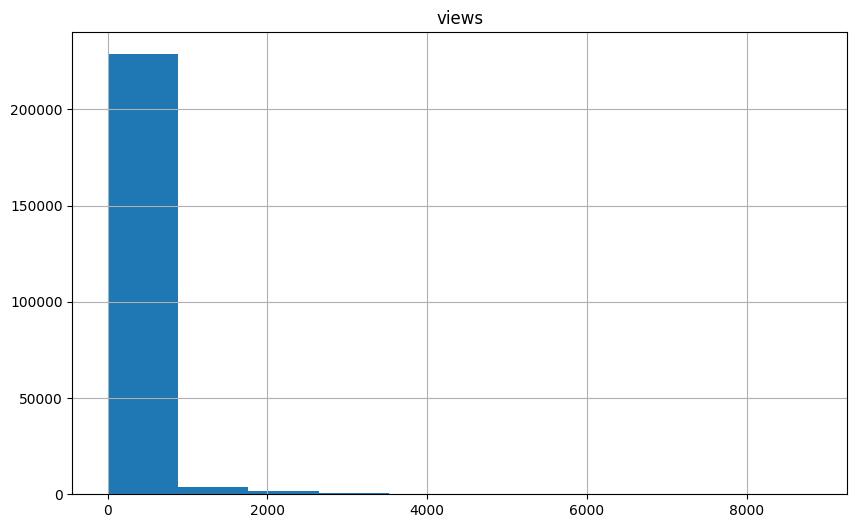

In [136]:
data.hist(['views'], figsize=[10,6])
plt.show()
# Observe the outlier Prices

## Data Pre-processing for Machine Learning
* Treating Missing Values (Interpolate/Replace with median/Mode values)
* Treating Outliers (Delete or replace with nearby logical value)
* Converting each Ordinal Categorical columns to numeric
* Converting all nominal Categorical columns to numeric
* Standardization/Normalization(Optional)

## Data Pre-Processing: Treating Missing Values

In [137]:
# Finding out how many missing values are present in each column
data.isnull().sum()

video_id                          0
day                               0
views                             0
redViews                          0
comments                          0
likes                             0
dislikes                          0
videosAddedToPlaylists            0
videosRemovedFromPlaylists        0
shares                            0
estimatedMinutesWatched           0
estimatedRedMinutesWatched        0
averageViewDuration               0
averageViewPercentage             0
annotationClickThroughRate        0
annotationCloseRate               0
annotationImpressions             0
annotationClickableImpressions    0
annotationClosableImpressions     0
annotationClicks                  0
annotationCloses                  0
cardClickRate                     0
cardTeaserClickRate               0
cardImpressions                   0
cardTeaserImpressions             0
cardClicks                        0
cardTeaserClicks                  0
subscribersGained           

In [138]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
data.nunique()

video_id                            211
day                                1893
views                              3070
redViews                           1057
comments                             20
likes                               116
dislikes                             14
videosAddedToPlaylists              138
videosRemovedFromPlaylists           33
shares                               47
estimatedMinutesWatched           23848
estimatedRedMinutesWatched        11007
averageViewDuration                6259
averageViewPercentage             10089
annotationClickThroughRate            1
annotationCloseRate                   1
annotationImpressions                 1
annotationClickableImpressions        1
annotationClosableImpressions         1
annotationClicks                      1
annotationCloses                      1
cardClickRate                        48
cardTeaserClickRate                 248
cardImpressions                      35
cardTeaserImpressions              1284


- Drop the cloumns which only have a single value

In [139]:
data.drop(data.nunique()[data.nunique()==1].index.to_list(),axis=1,inplace=True)

In [140]:
data.head()

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.0,0.0,1208.0,32.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,0.0,509.0,13.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,235.0,0.0,2351.0,64.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,3495.0,95.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,3629.0,99.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
data.drop(['video_id'],axis=1,inplace=True)

In [142]:
data=data.groupby('day').sum().reset_index()

In [143]:
data.head()

,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.0,0.0,1208.0,32.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-09-07,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,294.0,0.0,2860.0,78.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-09-08,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353.0,0.0,7124.0,195.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-09-09,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,269.0,0.0,2854.0,76.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-09-10,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,0.0,662.0,17.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [144]:
data['day']=pd.to_datetime(data['day'],format='%Y-%m-%d')

In [145]:
data['day_name']=data['day'].dt.day_name()
data['month_name']=data['day'].dt.month_name()

In [146]:
data.drop(['day'],axis=1,inplace=True)

In [147]:
data.head()

,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost,day_name,month_name
0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.0,0.0,1208.0,32.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday,September
1,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,294.0,0.0,2860.0,78.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday,September
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353.0,0.0,7124.0,195.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sunday,September
3,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,269.0,0.0,2854.0,76.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday,September
4,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,0.0,662.0,17.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday,September


# Separate categorical and continuous columns

In [148]:
categorical_columns=[]
continuous_columns=[]

for column in data.columns[1:]:
    unique_values = data[column].nunique()
    dtype = data[column].dtype
    # Check conditions: data type is 'object' and unique values <= 10
    if dtype == 'object' and unique_values <= 20:
        categorical_columns.append(column)
    else:
        continuous_columns.append(column)

In [149]:
categorical_columns

['day_name', 'month_name']

In [150]:
continuous_columns

['redViews',
 'comments',
 'likes',
 'dislikes',
 'videosAddedToPlaylists',
 'videosRemovedFromPlaylists',
 'shares',
 'estimatedMinutesWatched',
 'estimatedRedMinutesWatched',
 'averageViewDuration',
 'averageViewPercentage',
 'cardClickRate',
 'cardTeaserClickRate',
 'cardImpressions',
 'cardTeaserImpressions',
 'cardClicks',
 'cardTeaserClicks',
 'subscribersGained',
 'subscribersLost']

## Visualize distribution of all the categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

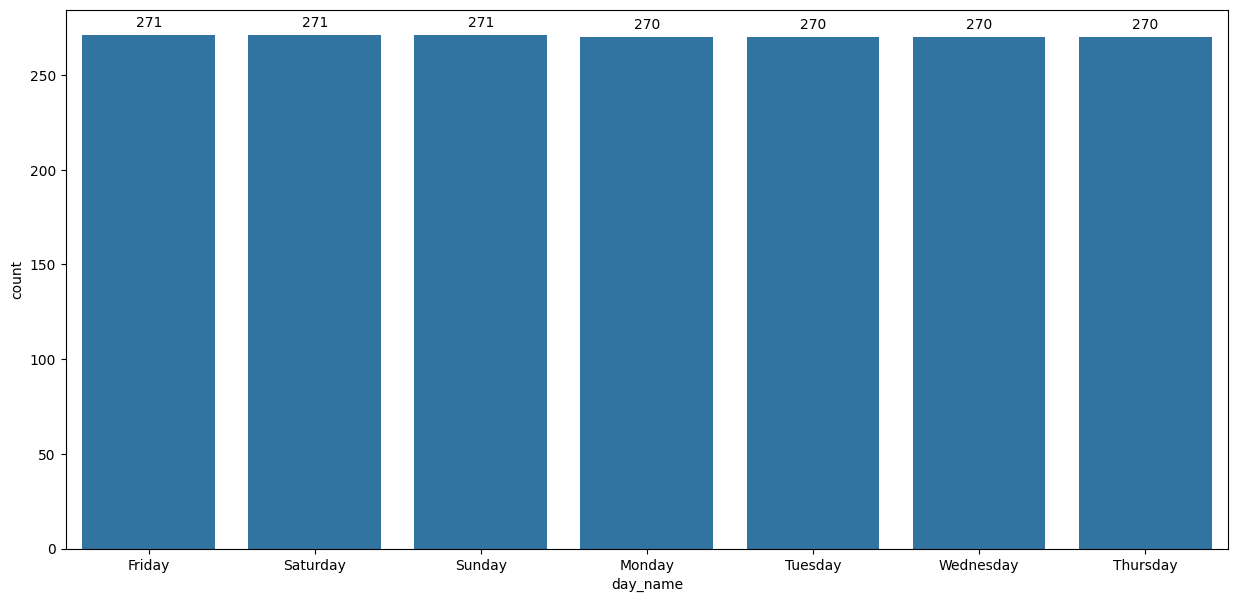

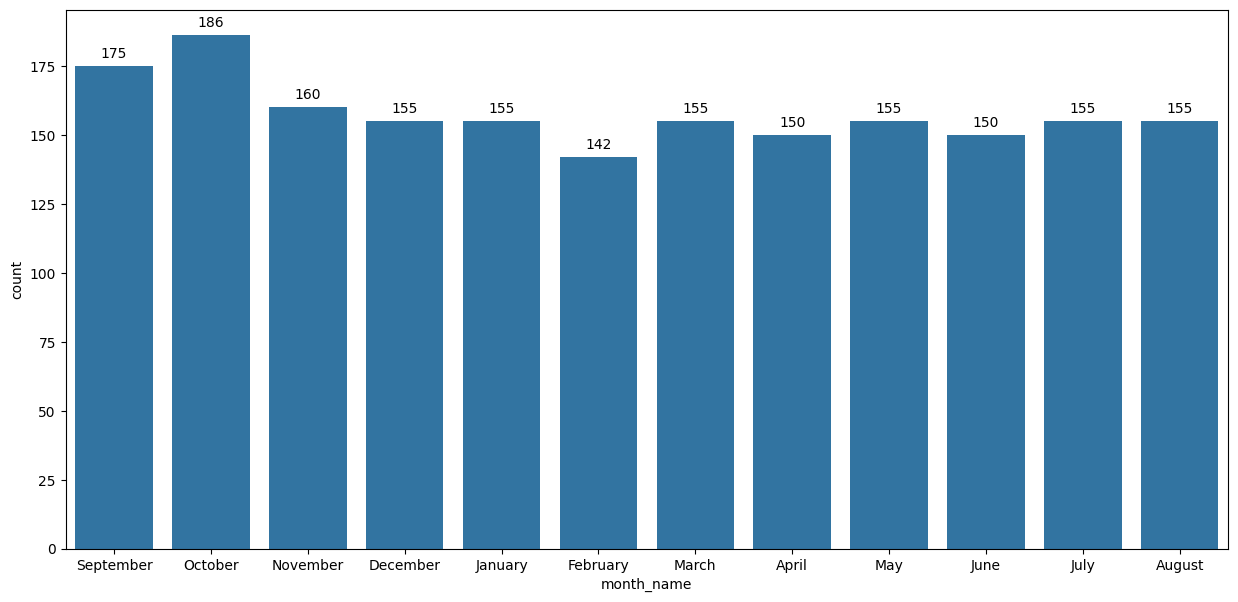

In [151]:
for col in categorical_columns:
    plt.figure(figsize=(15,7))
    ax=sns.countplot(data,x=col)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    plt.show()

- day_name did't have any distribution we need to remove it from final selection

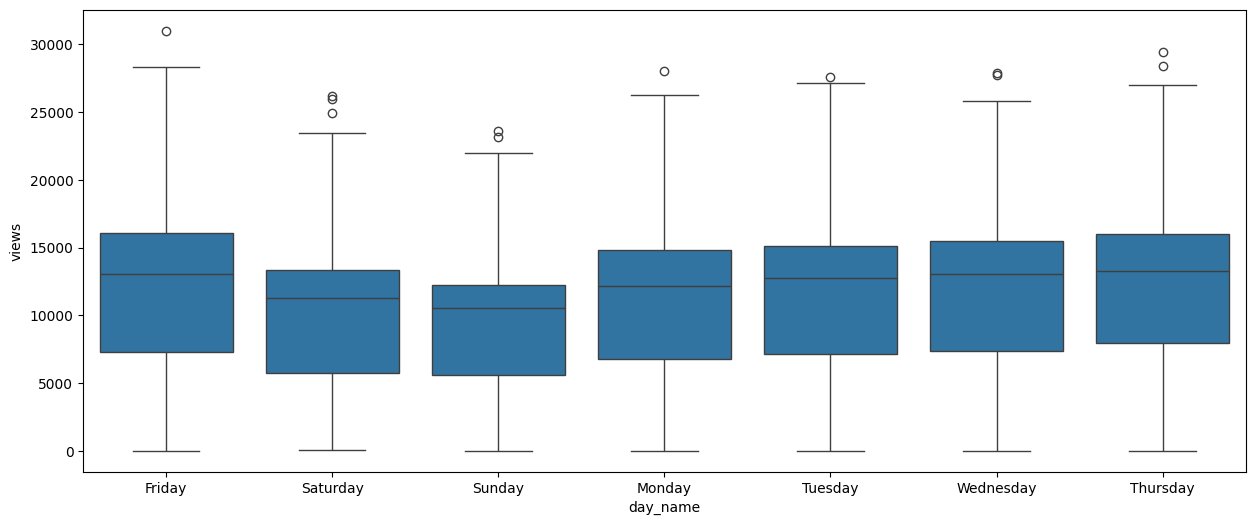

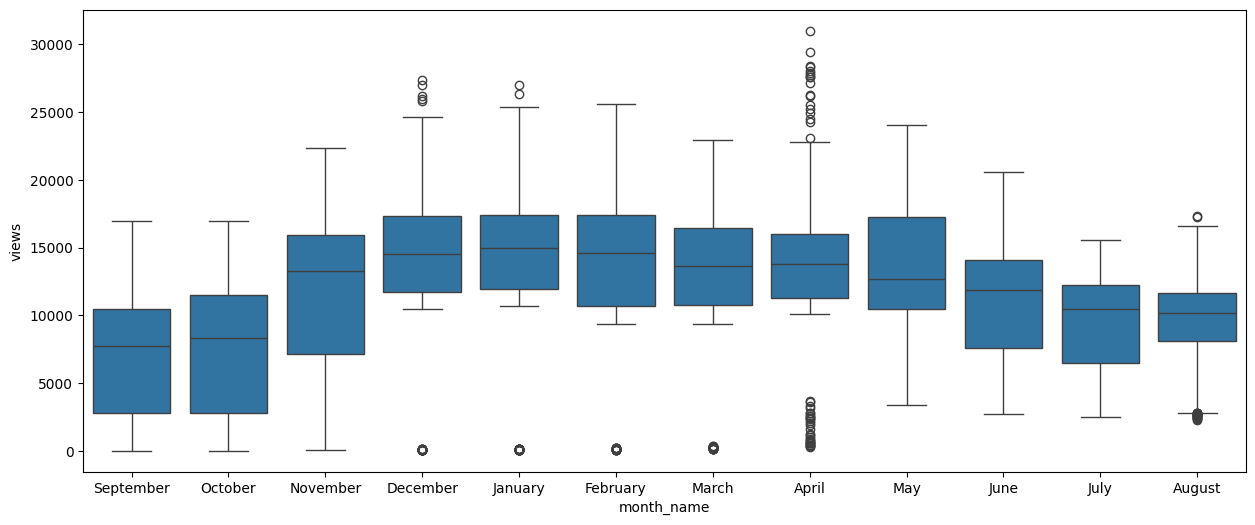

In [152]:
for col in categorical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data, x=col, y='views') # you can use boxplot as well to get undrstand the plot easily
    plt.show()

## Visualize distribution of all the numeric Predictor variables in the data using histograms

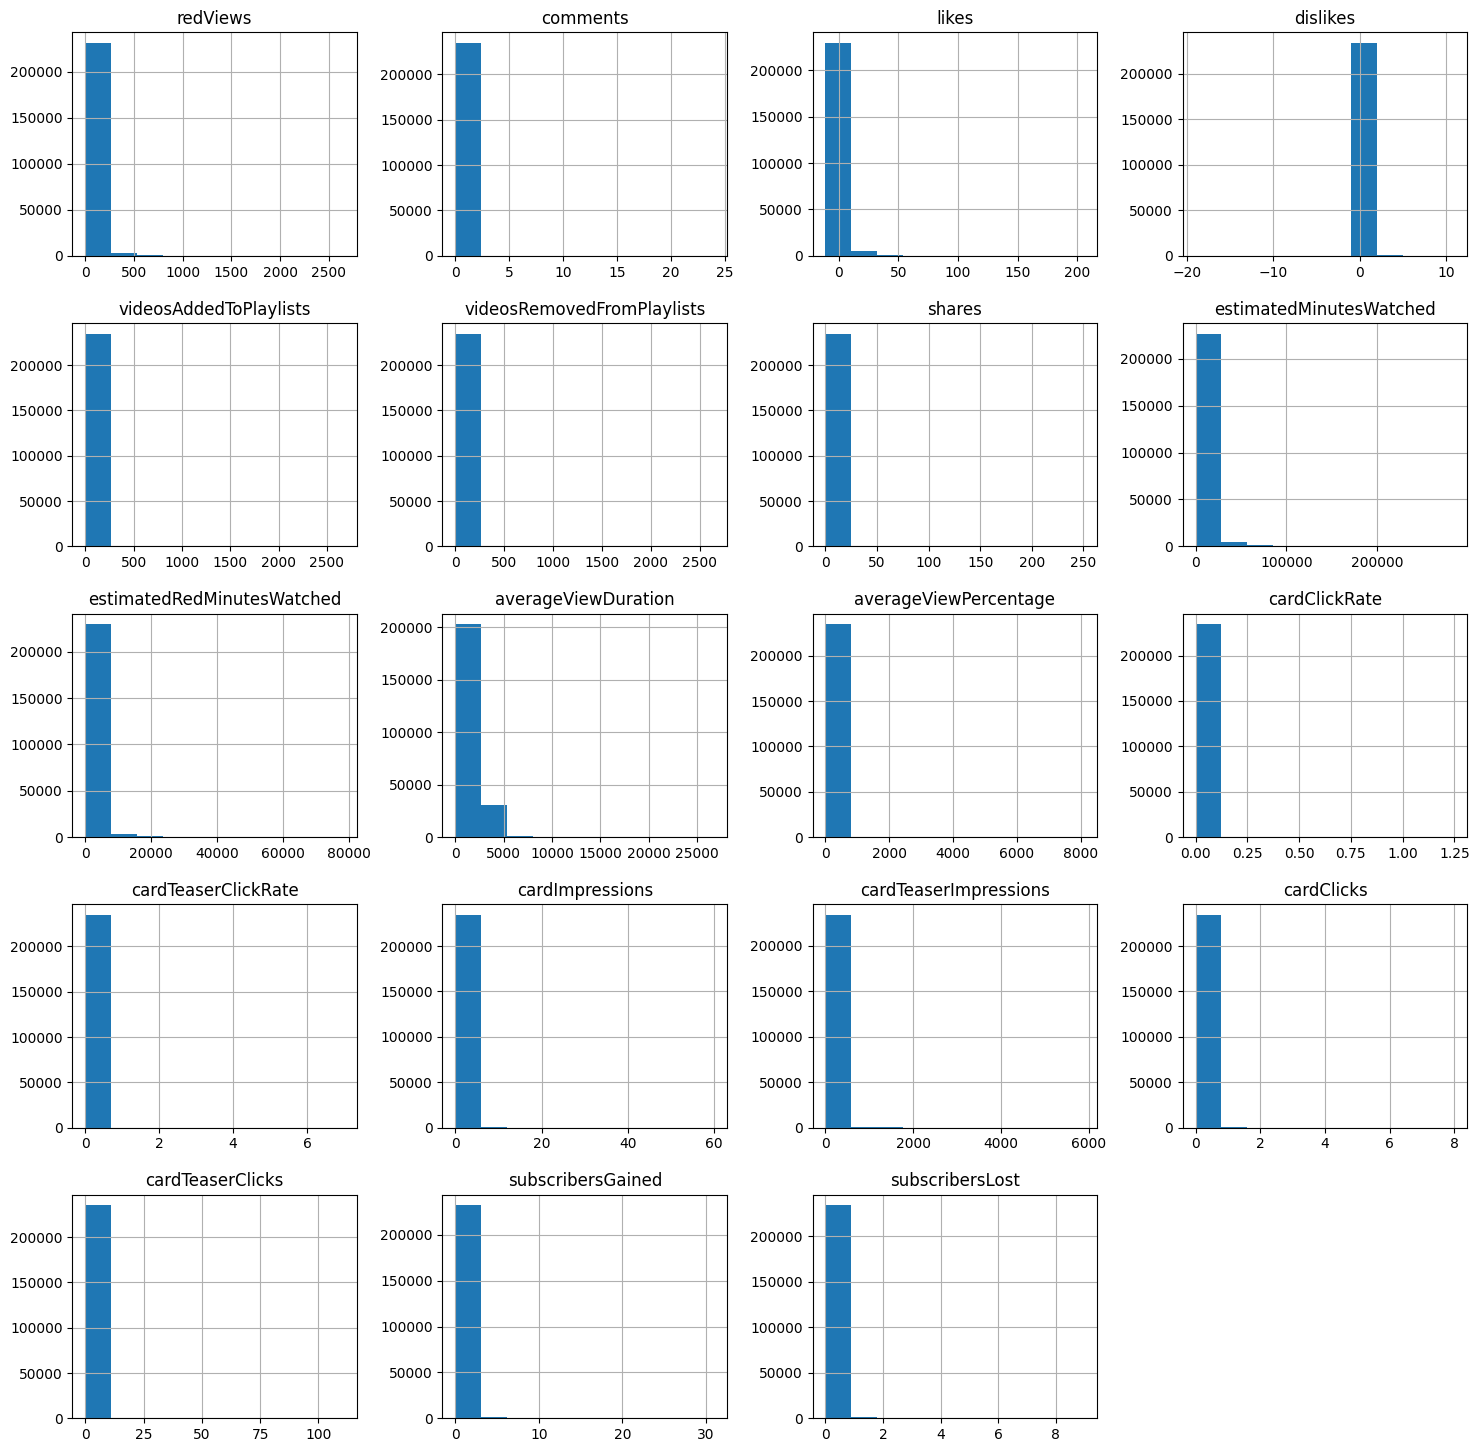

In [25]:
# Plotting histograms of multiple columns together
data.hist(continuous_columns, figsize=(18,18))
plt.show()

## Generating graphs for all numeric columns in data
* This gives a birds eye view about the numeric variables which looks correlated with Target Variable "cost"
* Do not run scatter_matrix() command for more than 10 variables at a time for performance issues

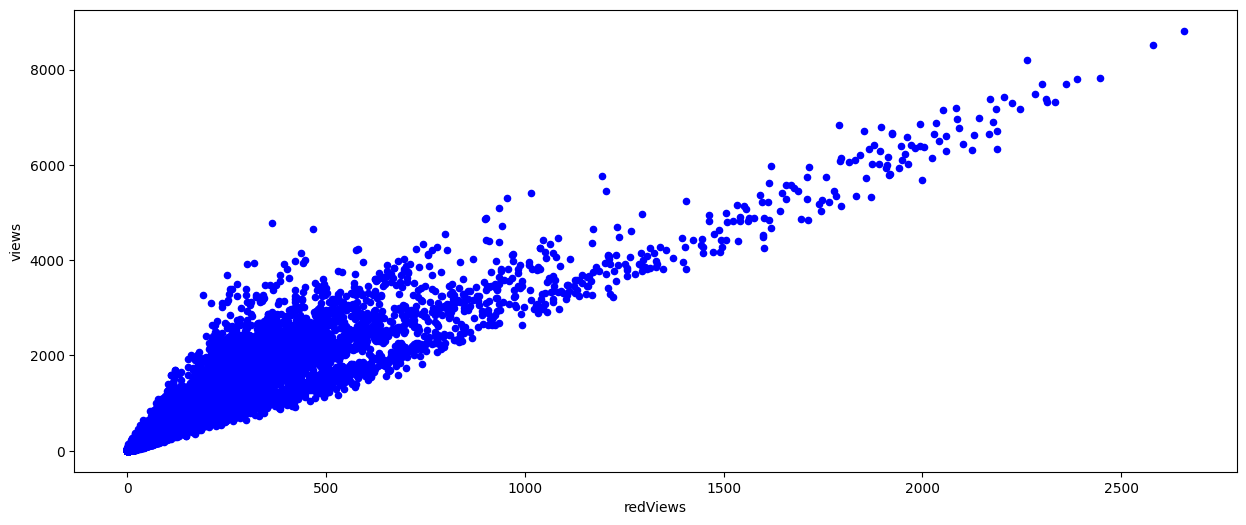

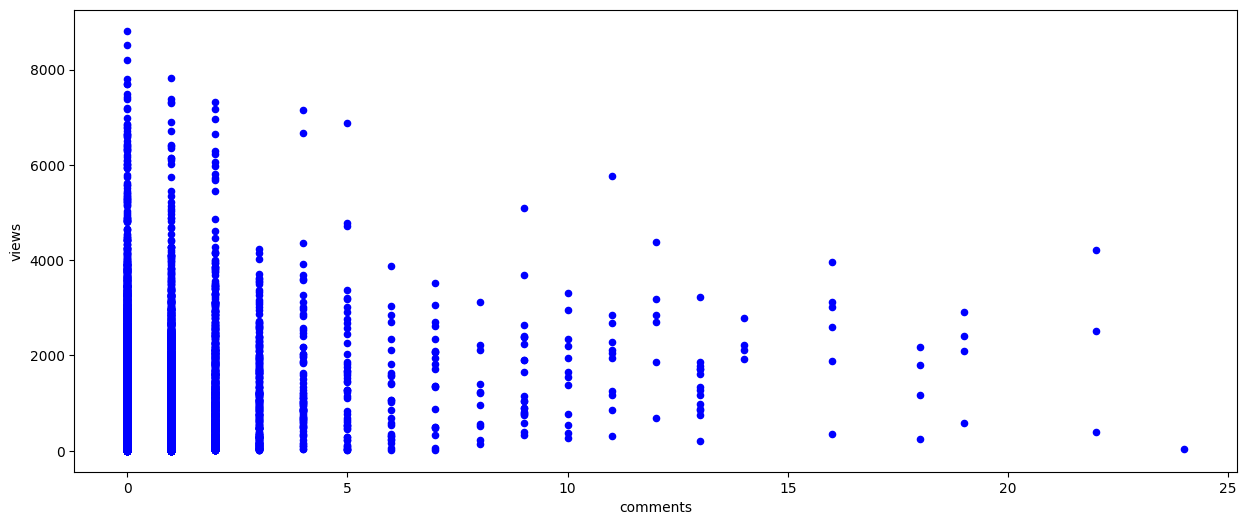

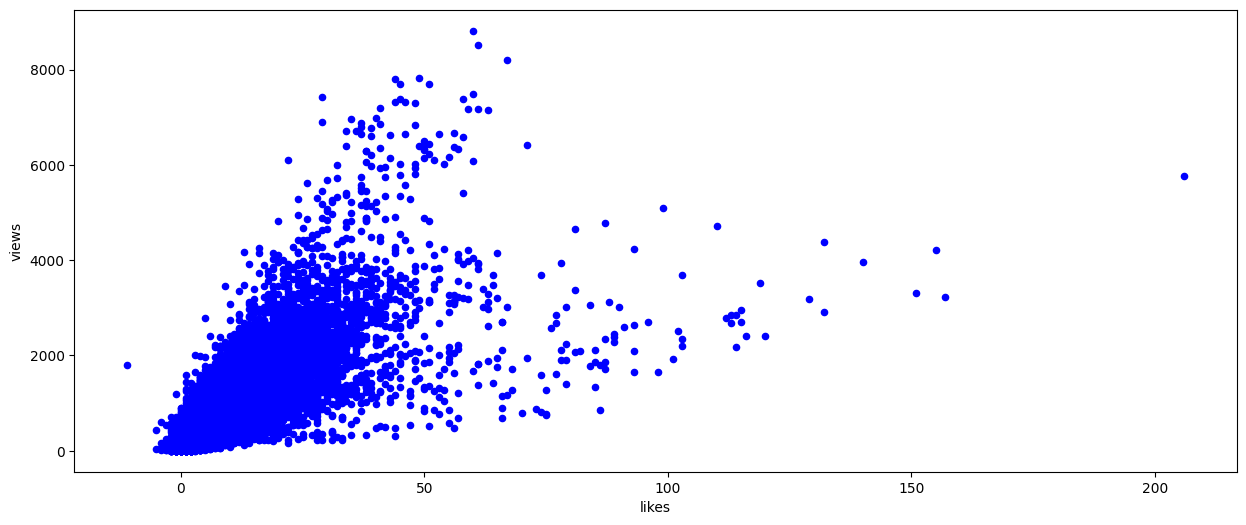

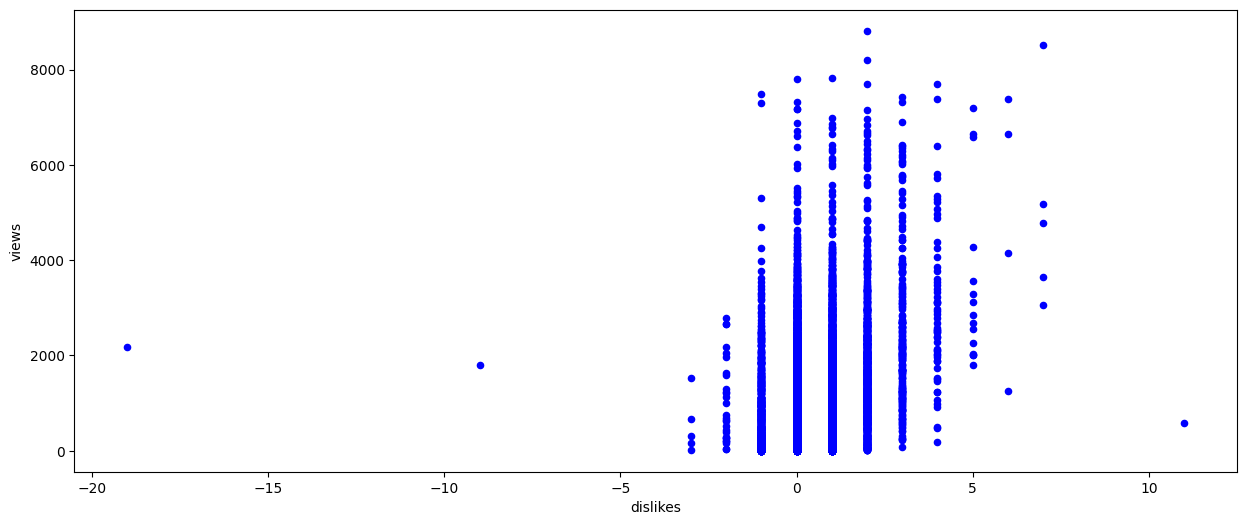

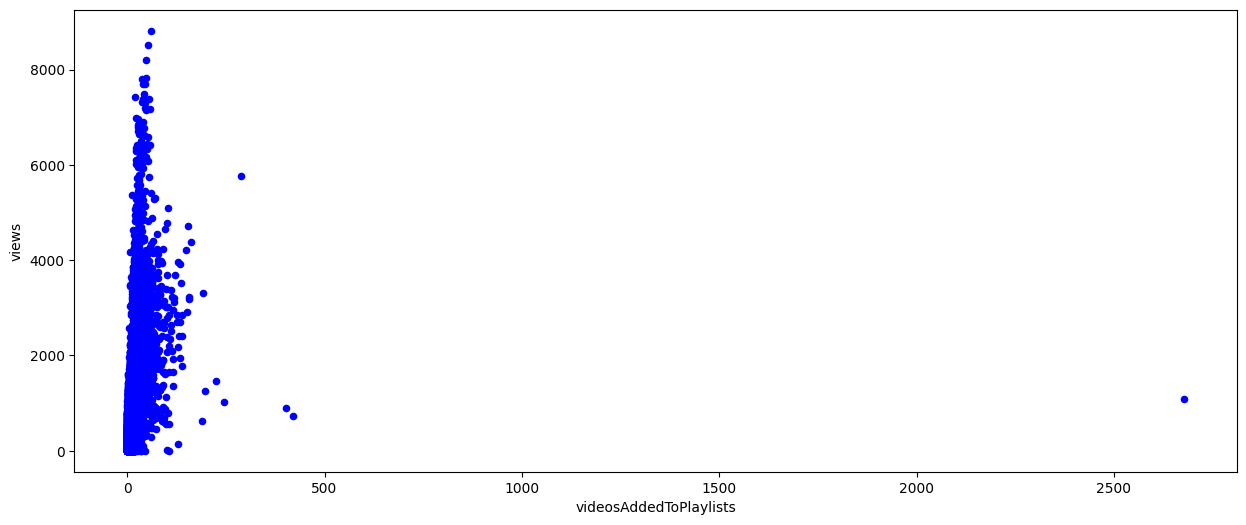

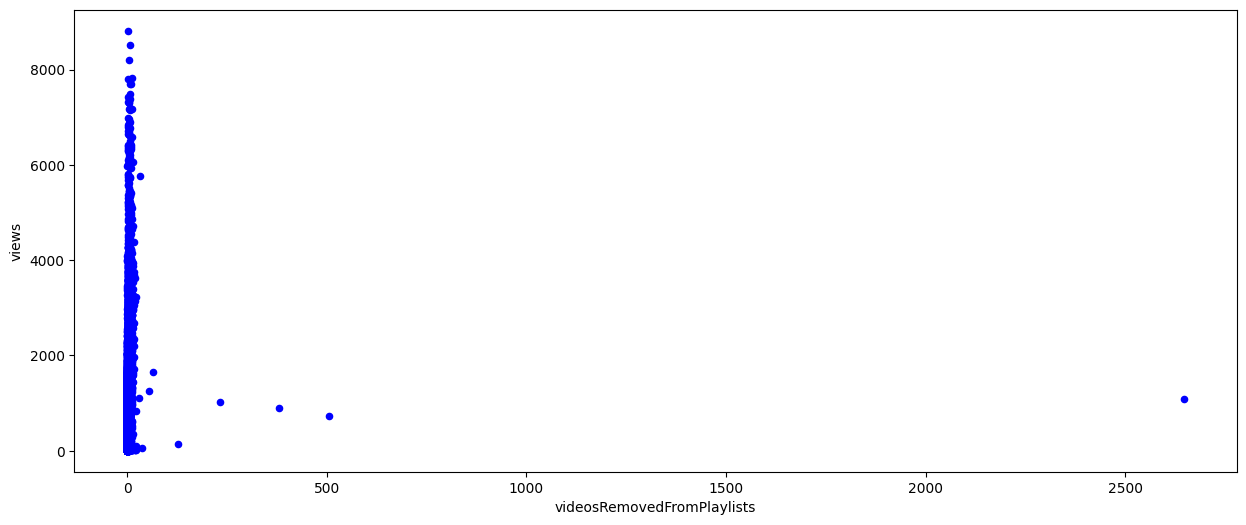

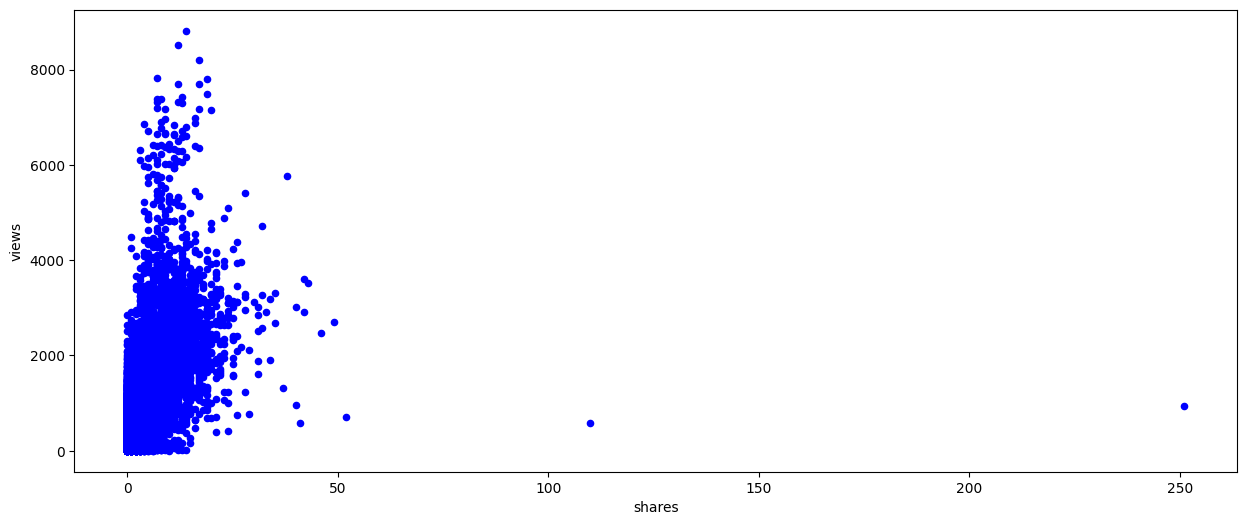

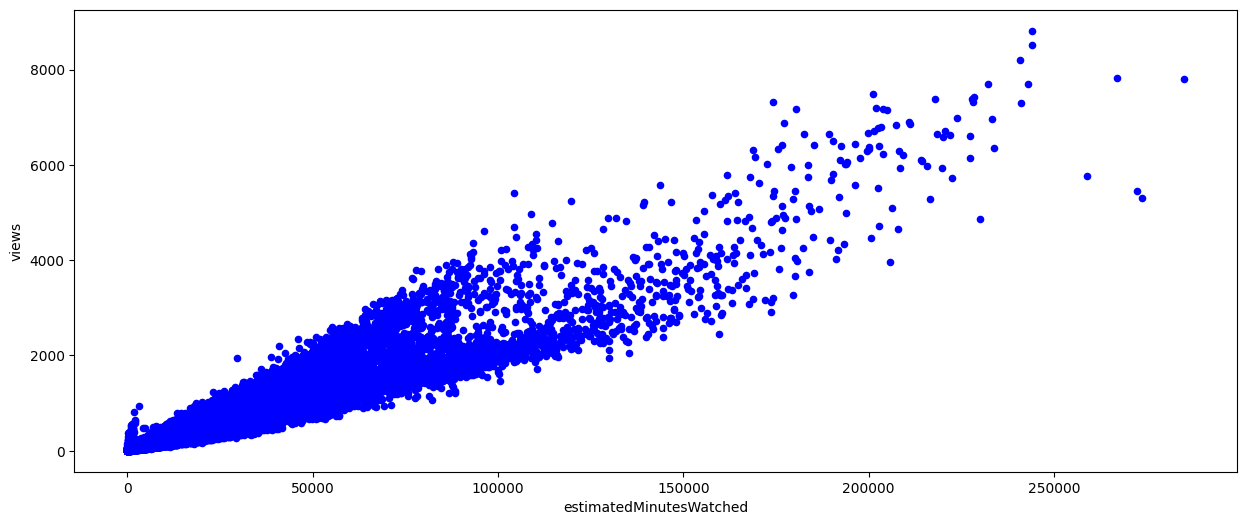

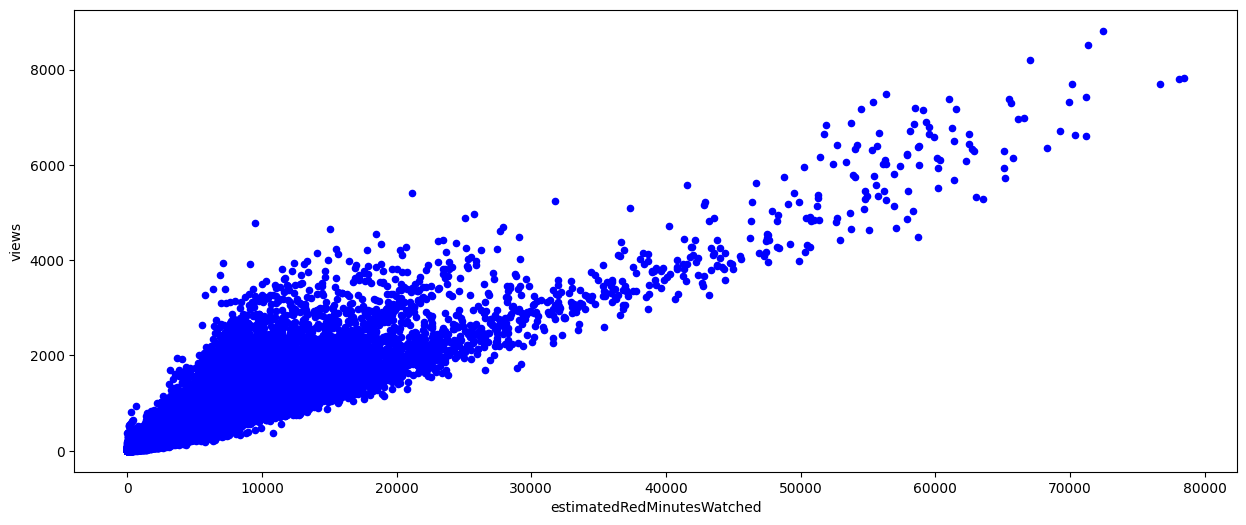

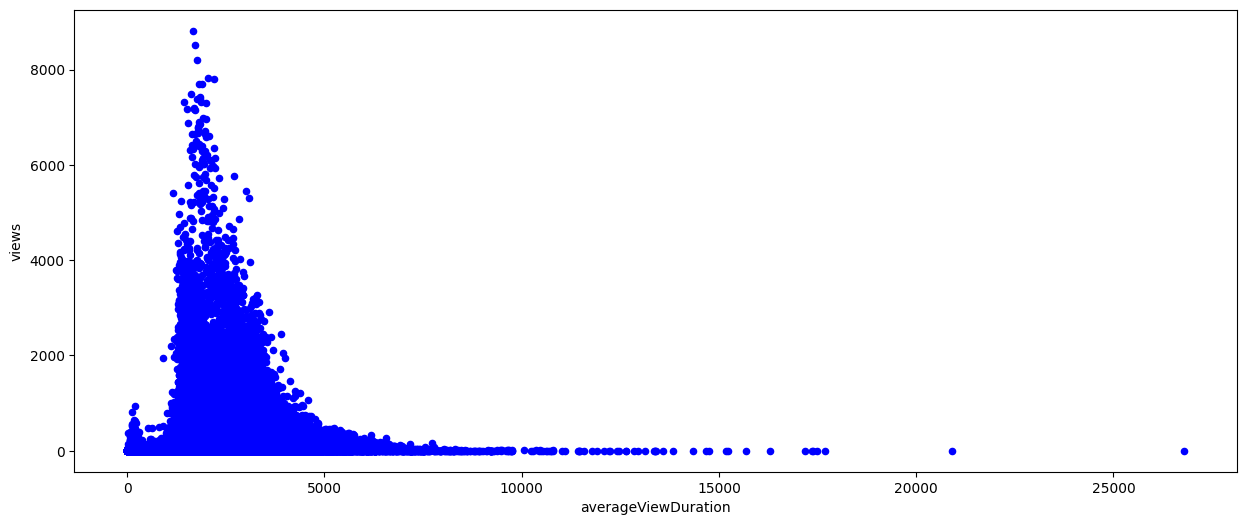

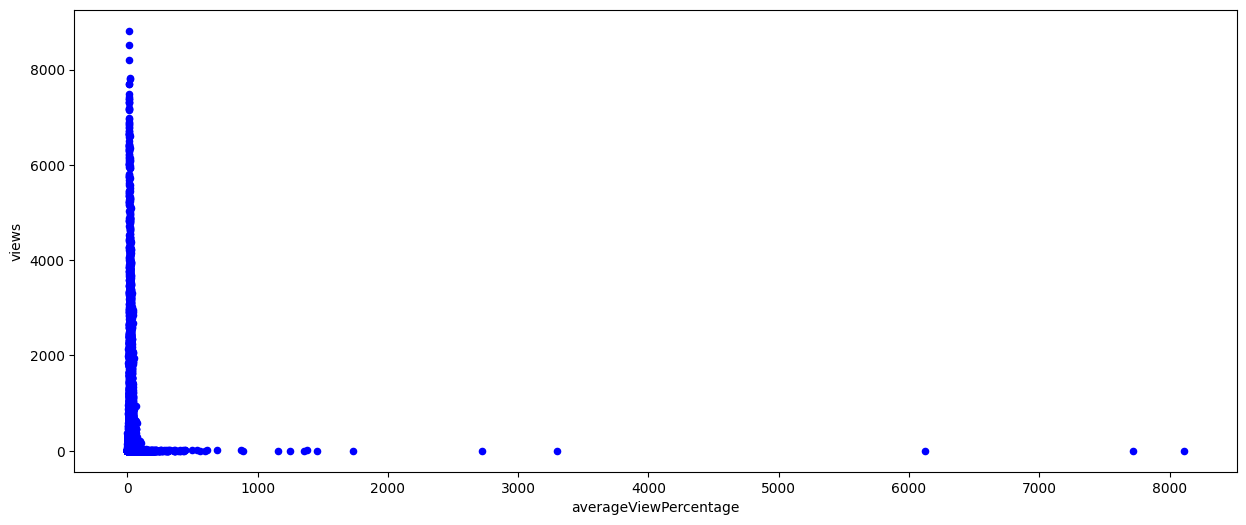

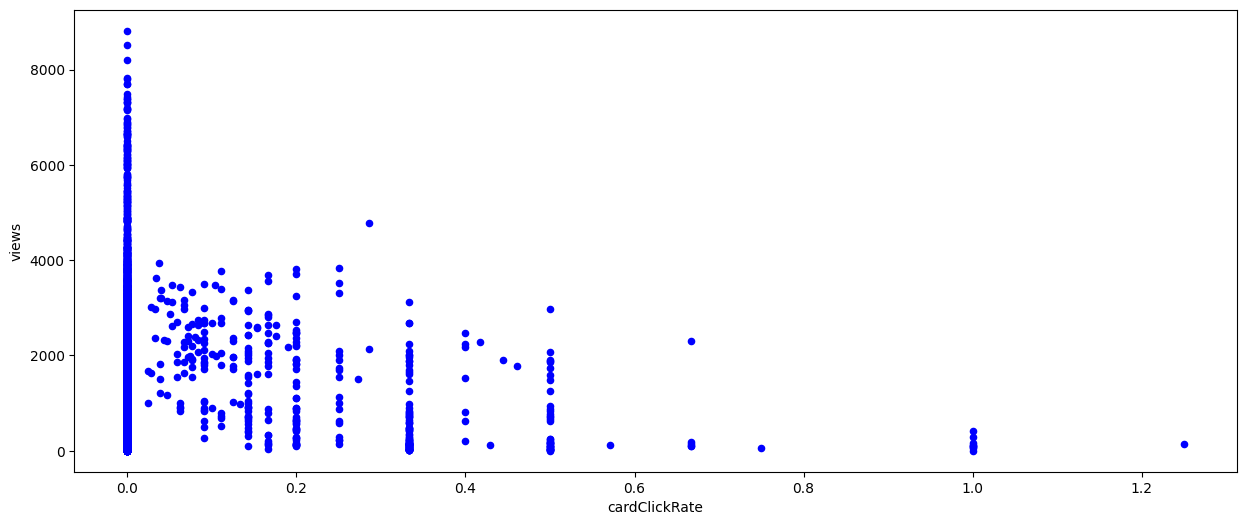

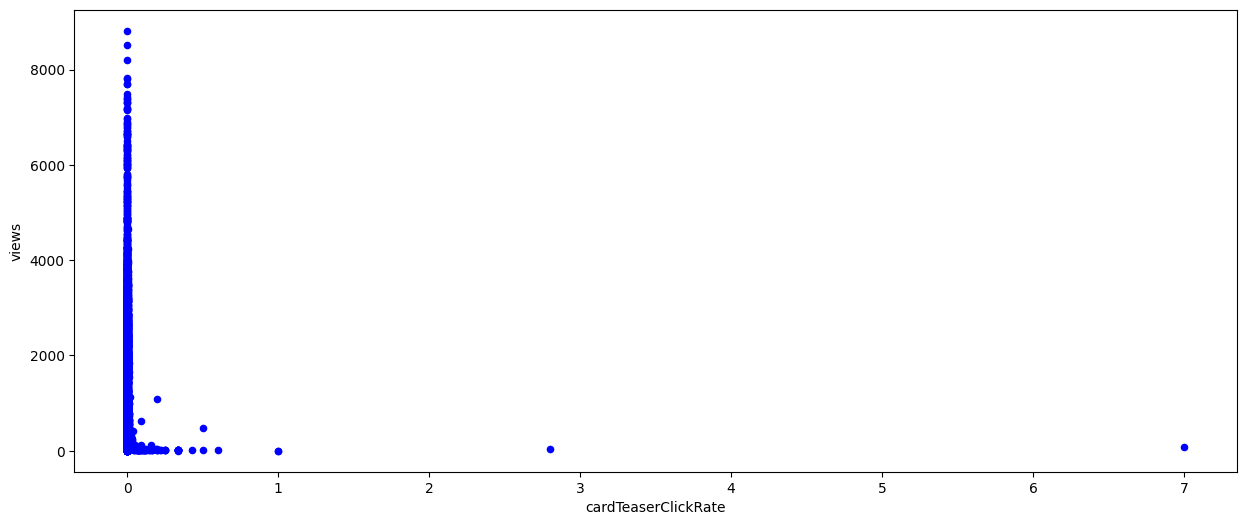

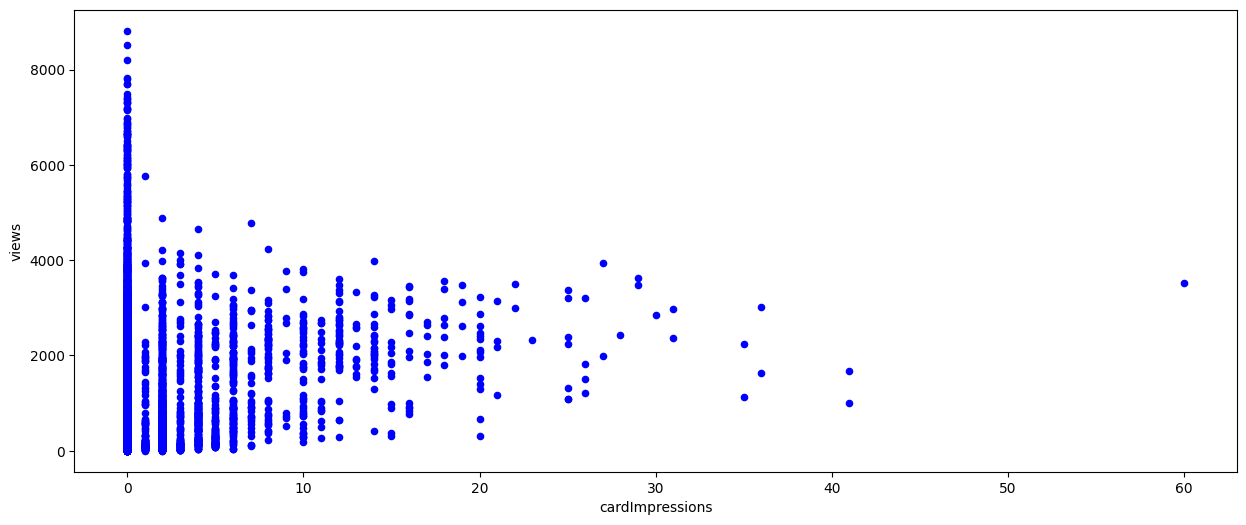

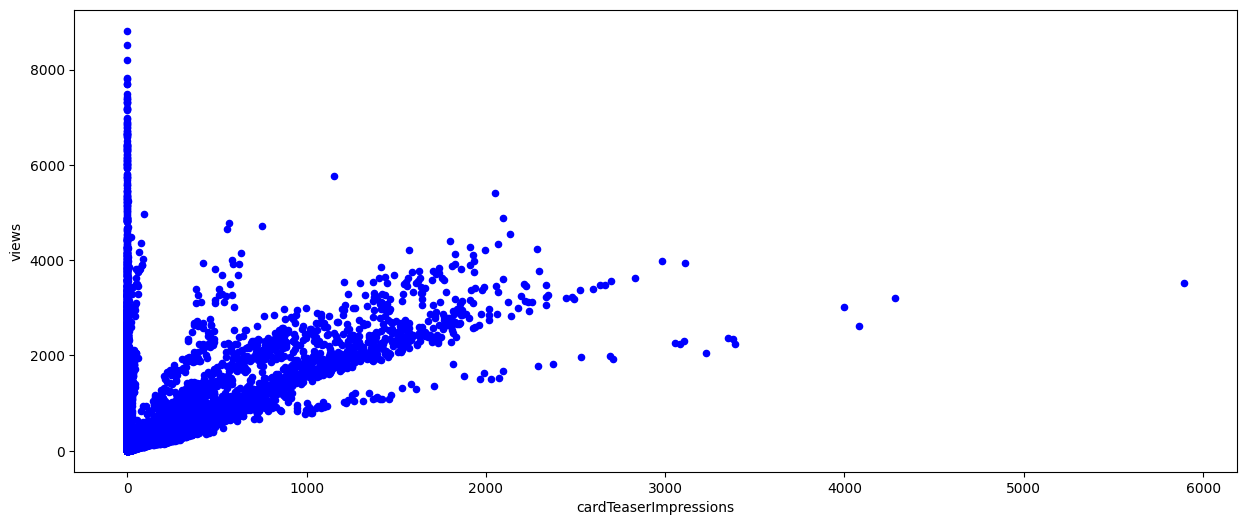

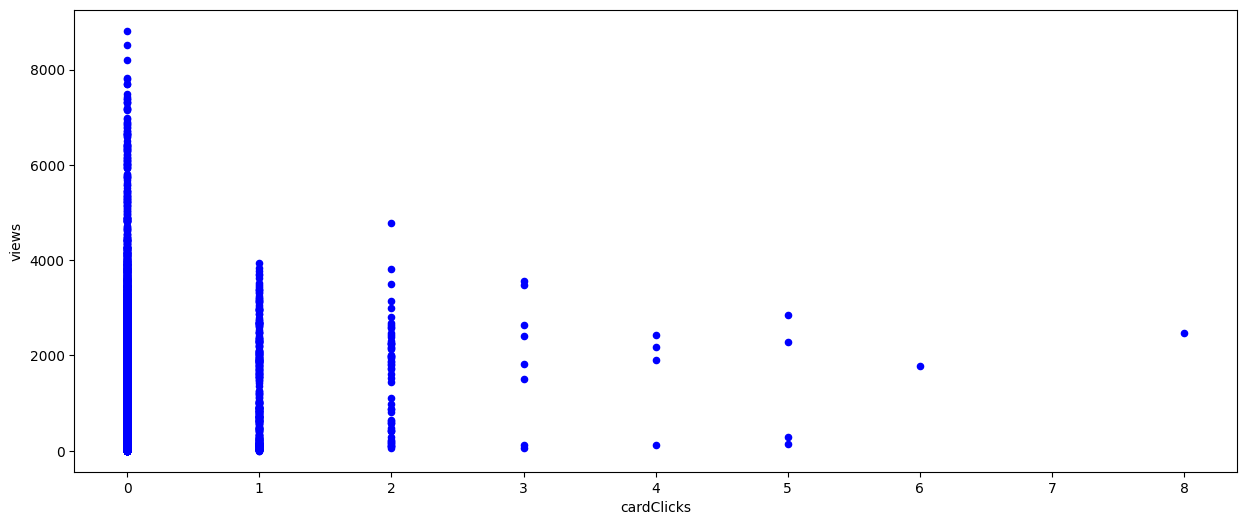

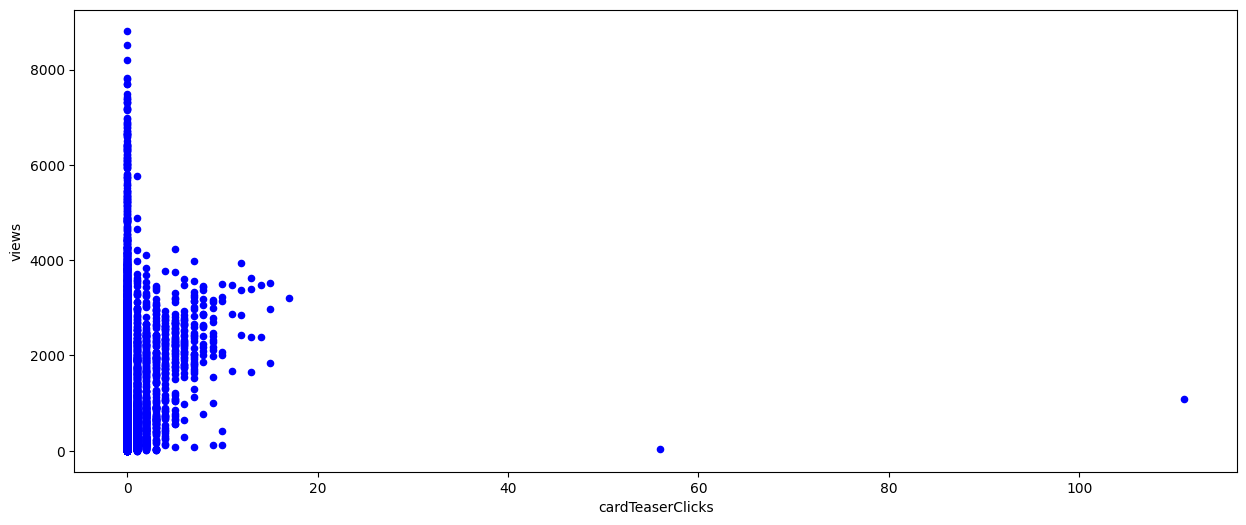

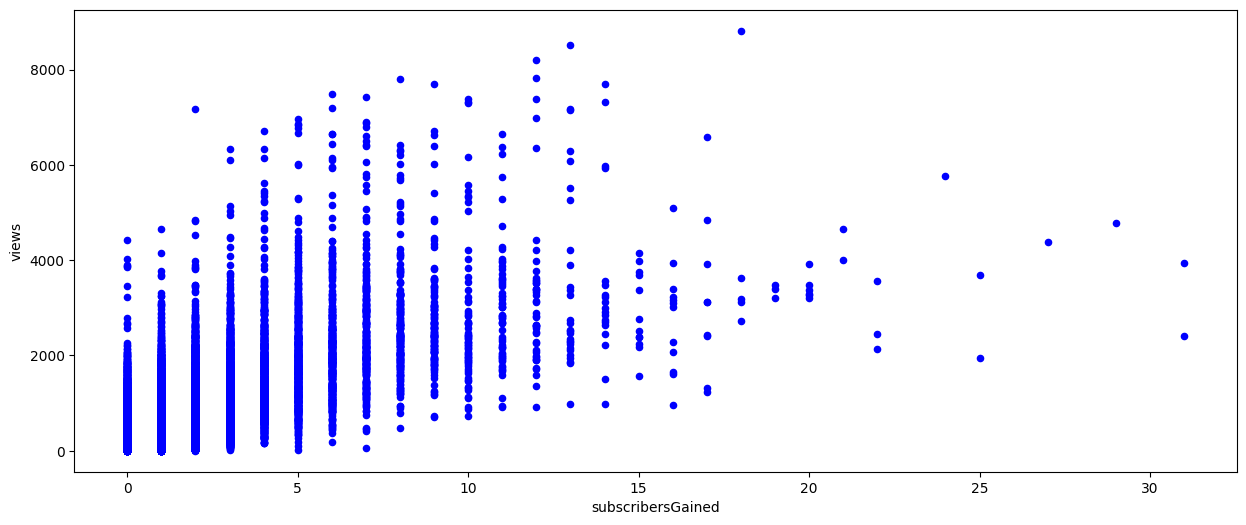

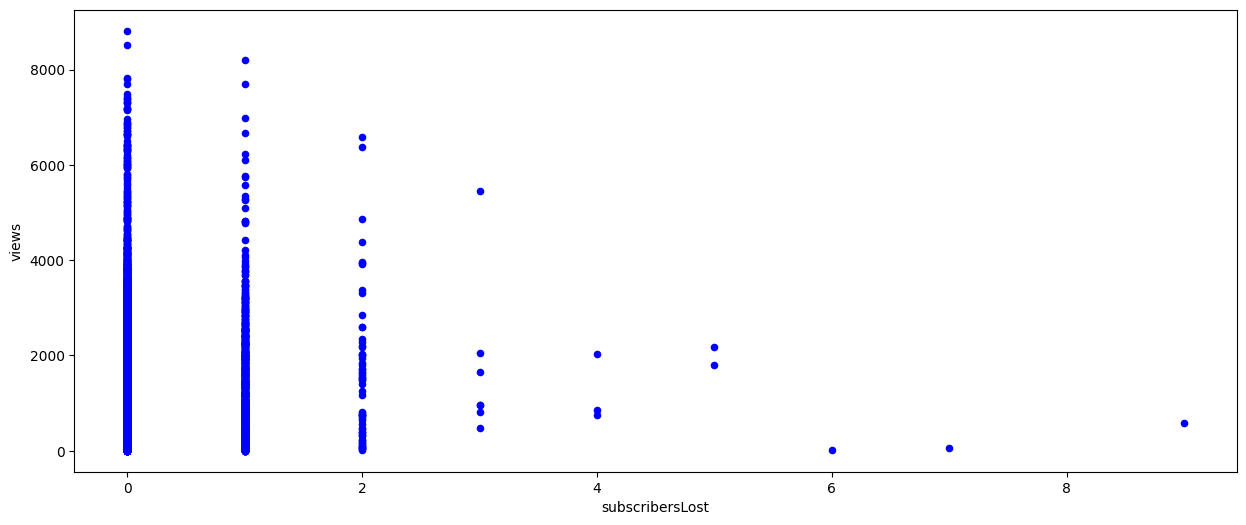

In [26]:
# Taling closer look at the Scatter plot between Price Vs Age
for cols in continuous_columns:
    data.plot.scatter(x=cols, y='views', figsize=(15,6), marker='o', color='blue')
    plt.show()

## Outlier Observation:
* This will bias the regression model, hence, if the number of records are less, it is advisable to remove these records or replace it with a logical value which is nearby to similar records according to the data

In [19]:
data=data[data['shares']<60].reset_index(drop=True)
data=data[data['averageViewDuration']<20000].reset_index(drop=True)
data=data[data['averageViewPercentage']<2000].reset_index(drop=True)
data=data[data['cardTeaserClicks']<25].reset_index(drop=True)

## Statistical Feature Selection (Continuous Vs Categorical) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical predictor variable)
* ANOVA Test result: Probability of H0 being true

In [153]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, PredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in PredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return (SelectedPredictors)

In [154]:
# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inpData=data, TargetVariable="views", PredictorList=categorical_columns)

##### ANOVA Results ##### 

day_name is correlated with views | P-Value: 1.4327008885754122e-06
month_name is correlated with views | P-Value: 1.0944395269650342e-51


['day_name', 'month_name']

- Even though we see there is no distribution in day_name in plot but here the ststistical test shows it have some significance

## Statistical Feature Selection (Continuous Vs Continuous) using Correlation Marix
Finding the top numeric continuous variables which correlate with the target variable

## Correlation Matrix
The correlation matrix is a square matrix that contains the Pearson product-moment
correlation coefficients (often abbreviated as Pearson's r), which measure the linear
dependence between pairs of features. The correlation coefficients are bounded
to the range -1 and 1. Two features have a perfect positive correlation if $r=1$, no
correlation if $r=0$ and a perfect negative correlation if $r=-1$ respectively. Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

$$r_{xy}=\frac{\sum{(X_{i}-\bar{X})(y_{i}-\bar{y})}}{\sqrt{\sum(X_{i}-\bar{X})^2 \sum(y_{i}-\bar{y})^2}}$$


* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

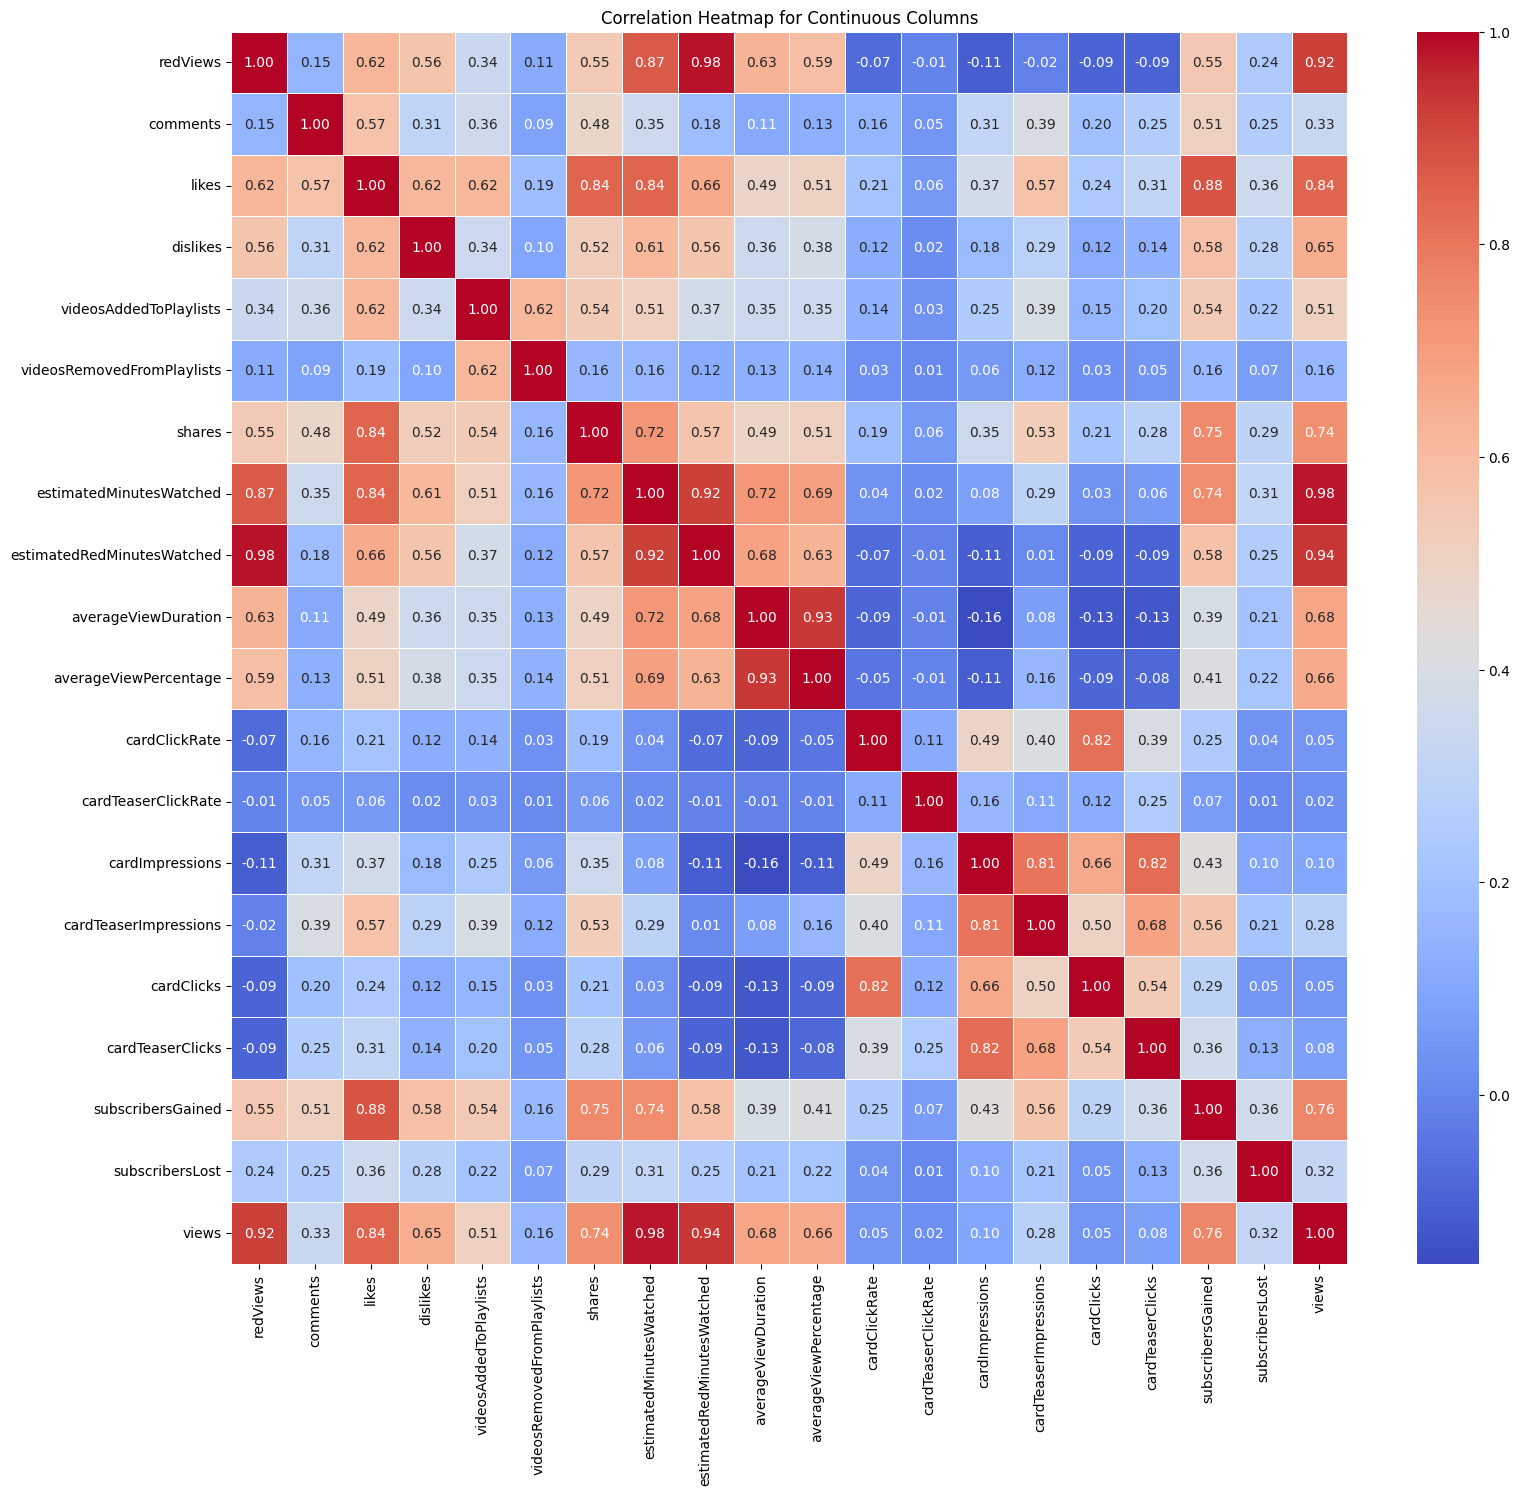

In [155]:
# Concatenate the target variable with the continuous columns
all_columns = continuous_columns + ['views']

# Calculate the correlation matrix for continuous columns
correlation_matrix = data[all_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Continuous Columns')
plt.show()

In [156]:
# Filtering only those columns where absolute correlation > 0.5 with Price
corr_var=correlation_matrix['views'][abs(correlation_matrix['views']) > 0.5 ].index.to_list()

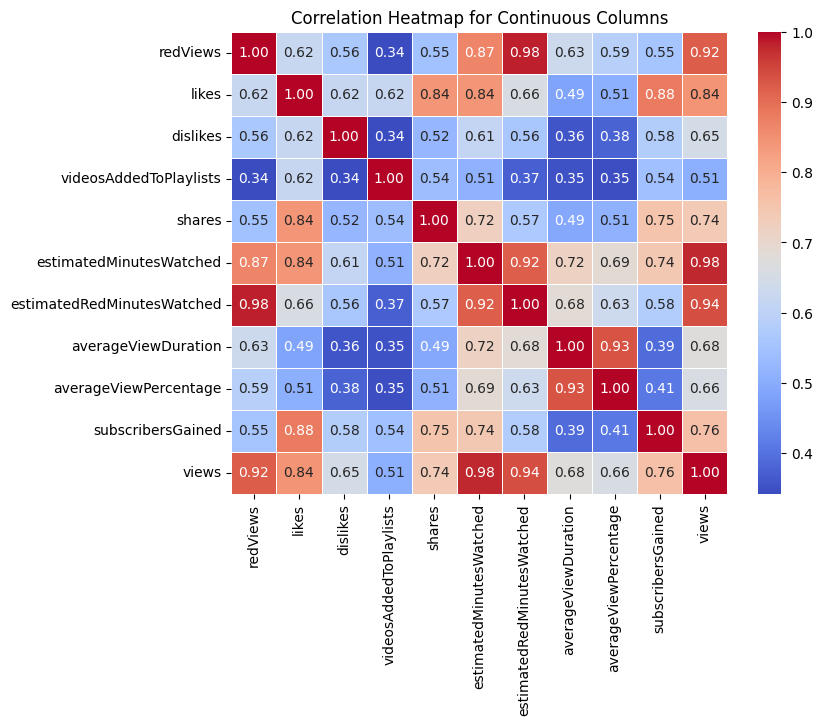

In [157]:
# Calculate the correlation matrix for continuous columns
corr_matrix = data[corr_var].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Continuous Columns')
plt.show()

In [158]:
data.head()

,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost,day_name,month_name
0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.0,0.0,1208.0,32.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday,September
1,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,294.0,0.0,2860.0,78.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday,September
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353.0,0.0,7124.0,195.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sunday,September
3,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,269.0,0.0,2854.0,76.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday,September
4,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,0.0,662.0,17.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday,September


## Data Pre-Processing: Converting Categorical data to numeric
1. First Treat all Ordinal variables by manually mapping the numeric values
2. Treat all nominal variables using dummy variables

In [159]:
# Since all the categorical variables are represented by numerical values we don't need to run these codes
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

## Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data

In [160]:
# import model related libraries
from sklearn.linear_model import LinearRegression

# import module to calculate model perfomance metrics # Average Error, Root Mean Square Error, MAPE, MAE, Accuracy, precision, recall
from sklearn import metrics # help you to evaluate the performance of your models

In [161]:
data.columns

Index(['views', 'redViews', 'comments', 'likes', 'dislikes',
       'videosAddedToPlaylists', 'videosRemovedFromPlaylists', 'shares',
       'estimatedMinutesWatched', 'estimatedRedMinutesWatched',
       'averageViewDuration', 'averageViewPercentage', 'cardClickRate',
       'cardTeaserClickRate', 'cardImpressions', 'cardTeaserImpressions',
       'cardClicks', 'cardTeaserClicks', 'subscribersGained',
       'subscribersLost', 'day_name', 'month_name'],
      dtype='object')

In [195]:
# Separate Target Variable and Predictor Variables
TargetVariable='views'
Predictors=['comments', 'dislikes', 'videosRemovedFromPlaylists', 
       'averageViewDuration', 'averageViewPercentage', 'cardClickRate',
       'cardTeaserClickRate', 'cardImpressions', 'cardTeaserImpressions',
       'cardClicks', 'cardTeaserClicks', 'subscribersLost', 'day_name', 'month_name']
X=data[Predictors]
y=np.log1p(data[TargetVariable].values)

In [196]:
# pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

# ct = make_column_transformer(
#     (MinMaxScaler(), ['unit_sales(in millions)', 'total_children',
#        'num_children_at_home', 'avg_cars_at home(approx).1',
#        'units_per_case',
#        'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
#        'have_car', 'store_area']),
#     (StandardScaler(), ['store_sqft']),
#     remainder='passthrough'
# )
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [197]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1514, 14)
(1514,)
(379, 14)
(379,)


## Create a base model

In [199]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Models and their parameters
models = [
    {'name': 'Linear Regression', 'model': LinearRegression(), 'params': {}},
    {'name': 'Decision Tree', 'model': DecisionTreeRegressor(), 'params': {'max_depth': 5}},
    {'name': 'Random Forest', 'model': RandomForestRegressor(), 'params': {'n_estimators': 100, 'max_depth': 5}},
    {'name': 'XGBoost', 'model': XGBRegressor(), 'params': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}}
]

# Results DataFrame
results = []

# Loop through models
for model_info in models:
    name = model_info['name']
    model = model_info['model']
    params = model_info['params']

    # Set parameters
    model.set_params(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_accuracy = r2_score(y_train, y_train_pred)
    test_accuracy = r2_score(y_test, y_test_pred)

    # Collect results
    results.append({
        'Model Name': name,
        'Parameters': params,
        'Train R_Square': train_accuracy,
        'Test R_Sqare': test_accuracy,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

In [200]:
results_df

,Model Name,Parameters,Train R_Square,Test R_Sqare,Train RMSE,Test RMSE
0,Linear Regression,{},0.830887,0.800917,0.737310,0.752002
1,Decision Tree,{'max_depth': 5},0.974719,0.962369,0.285075,0.326943
2,Random Forest,"{'n_estimators': 100, 'max_depth': 5}",0.981584,0.968710,0.243312,0.298131
3,XGBoost,"{'n_estimators': 100, 'learning_rate': 0.1, 'm...",0.995396,0.977905,0.121658,0.250521


In [201]:
results_df['Parameters'][3]

{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

- XGBoost is the preferred model based on its strong generalization performance, balance in metrics, and reduced likelihood of overfitting.

## XGBoost

In [202]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Set up the grid of hyperparameters
param_grid = {
    'n_estimators': [80, 100, 120],  # Number of trees
    'max_depth': [4, 5, 6],  # Maximum depth of trees
    'learning_rate': [0.05, 0.1, 0.15],  # Step size per tree
    'subsample': [0.8, 1.0],  # Fraction of training data used in each tree
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # For regression, we use negative MSE
    cv=5,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all CPU cores
)

# Fit the GridSearch to the data
grid_search.fit(X_train, y_train)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [203]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 120,
 'subsample': 0.8}

In [204]:
# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
print("R_square value on train data : ",r2_score(y_train, y_train_pred))
print("RSME value on test data : ",np.sqrt(mean_squared_error(y_test, y_test_pred, squared=False)))

R_square value on train data :  0.9953957794483185
RSME value on test data :  0.5040243047531175


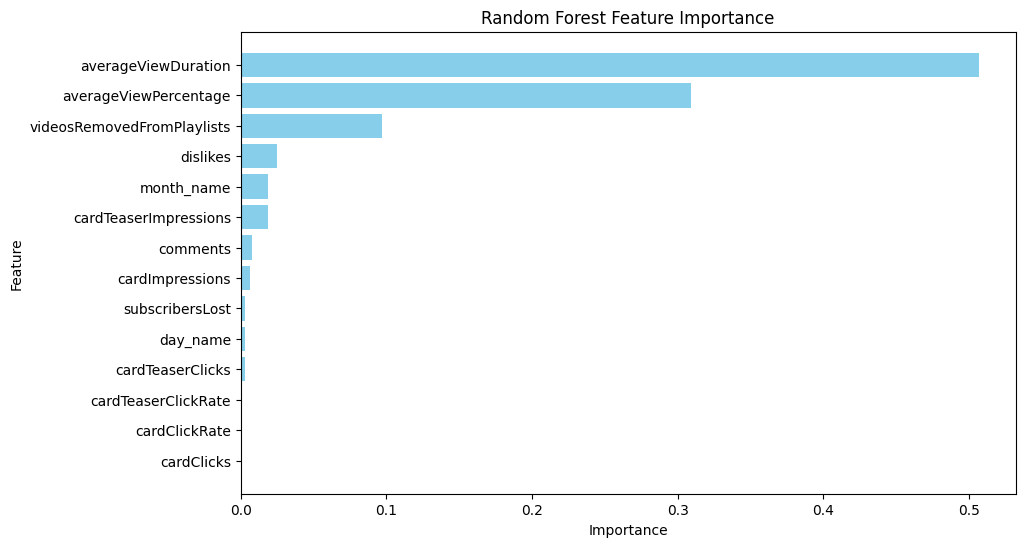

In [205]:
# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': Predictors,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Flip the order of features for better readability
plt.show()

In [214]:
best_model.predict(X_train)

array([9.1774025, 9.513703 , 9.673715 , ..., 9.685298 , 8.332168 ,
       9.290967 ], dtype=float32)

In [217]:
y_pred_train=best_model.predict(X_train)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_train, columns=Predictors)
TestingDataResults[TargetVariable]=y_train
TestingDataResults[('Predicted_'+TargetVariable)]=np.round(y_pred_train,6)
TestingDataResults.head()

,comments,dislikes,videosRemovedFromPlaylists,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersLost,day_name,month_name,views,Predicted_views
0,0.058824,0.578947,0.013383,0.360908,0.183996,0.318239,0.010186,0.444444,0.589094,0.333333,0.151786,0.000000,0.166667,0.090909,9.159152,9.177402
1,0.058824,0.526316,0.010781,0.888584,0.397021,0.000000,0.000000,0.000000,0.094807,0.000000,0.000000,0.000000,0.666667,0.272727,9.272188,9.513703
2,0.183824,0.736842,0.014498,0.588067,0.263527,0.000000,0.018786,0.246914,0.429573,0.000000,0.080357,0.000000,1.000000,0.636364,9.663452,9.673715
3,0.036765,0.552632,0.015613,0.869550,0.422796,0.000000,0.000000,0.000000,0.145265,0.000000,0.000000,0.090909,1.000000,0.636364,9.527703,9.575374
4,0.088235,0.578947,0.015613,0.784498,0.421202,0.000000,0.004129,0.234568,0.410001,0.000000,0.071429,0.090909,0.666667,1.000000,9.681031,9.637020


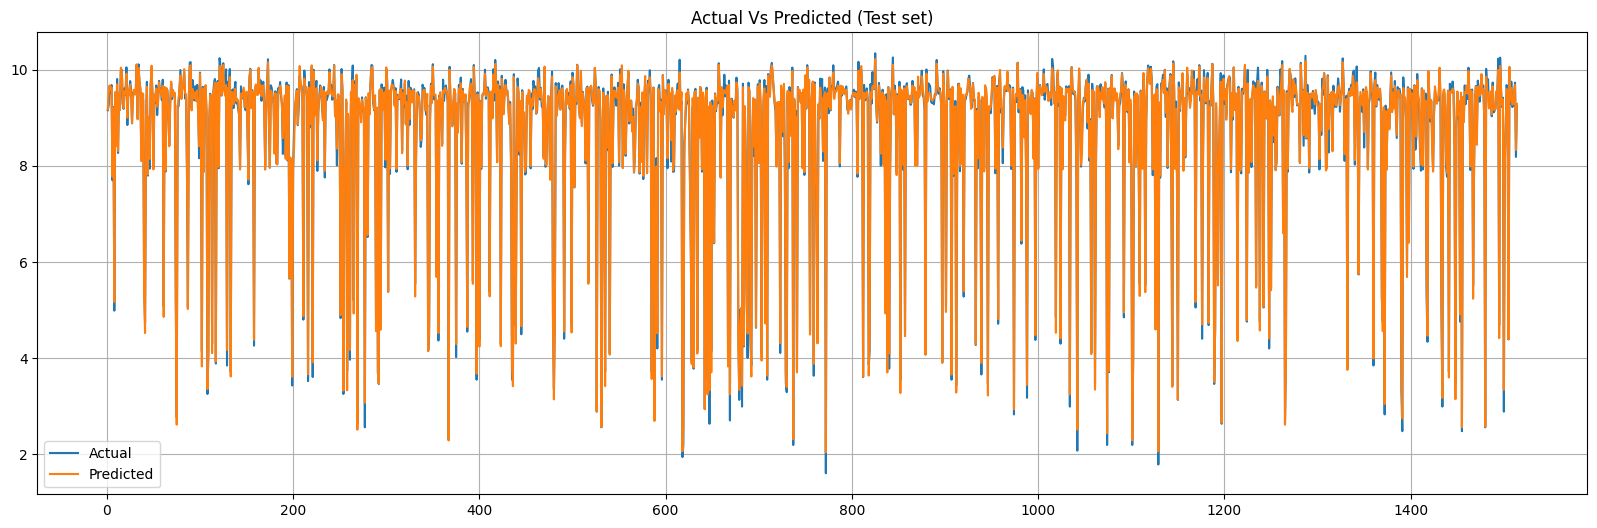

In [218]:
x=np.arange(1,len(y_train)+1)
plt.figure(figsize=(20,6))
plt.plot(x,y_train,label='Actual')
plt.plot(x,y_pred_train,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

- Based on this graph we the model didn't perform well, so we have to build non-linear regression model.

In [219]:
TestingDataResults['APE']= np.abs((TestingDataResults['views'] - TestingDataResults['Predicted_views']) / TestingDataResults['views']) * 100

# Printing the top 10 errors made by the model
TestingDataResults.sort_values(by='APE', ascending=False).head(10)

,comments,dislikes,videosRemovedFromPlaylists,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersLost,day_name,month_name,views,Predicted_views,APE
771,0.0,0.447368,0.0,0.007688,0.004773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.000000,1.609438,2.047580,27.223299
646,0.0,0.447368,0.0,0.071622,0.045313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.909091,2.639057,3.335130,26.375806
1041,0.0,0.447368,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,1.000000,2.079442,2.516020,20.994989
668,0.0,0.447368,0.0,0.033114,0.021580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.181818,2.708050,3.251855,20.081042
276,0.0,0.447368,0.0,0.026335,0.016869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.909091,2.564949,3.078835,20.034924
618,0.0,0.447368,0.0,0.023615,0.014606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.000000,2.197225,2.569158,16.927423
1499,0.0,0.447368,0.0,0.058658,0.040248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.181818,2.890372,3.343722,15.684846
1128,0.0,0.447368,0.0,0.017390,0.011560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.000000,1.791759,2.064613,15.228251
681,0.0,0.447368,0.0,0.085868,0.057459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.909091,2.995732,3.430240,14.504221
587,0.0,0.447368,0.0,0.021927,0.013702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1.000000,3.135494,2.697048,13.983322


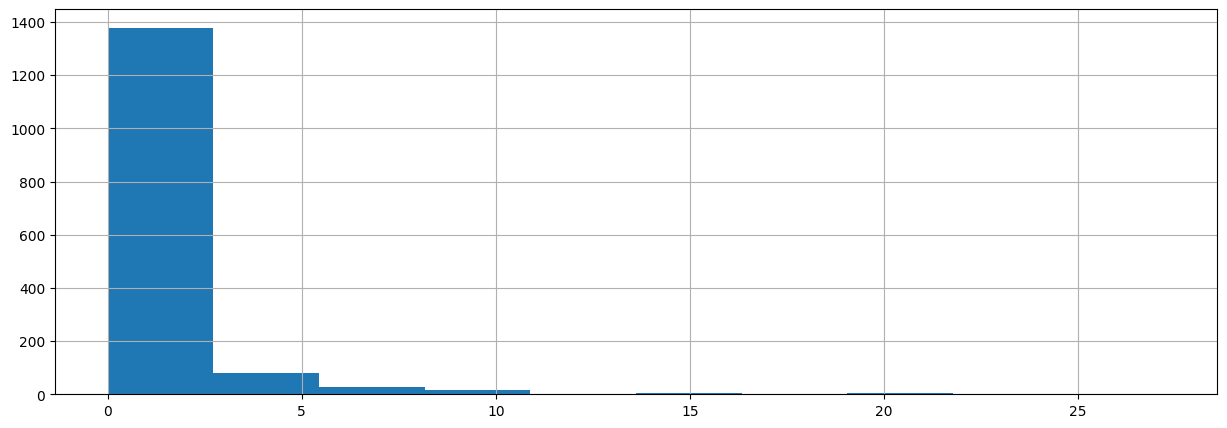

In [220]:
# Looking at the distribution of errors
TestingDataResults['APE'].hist(figsize=(15,5))
plt.show()

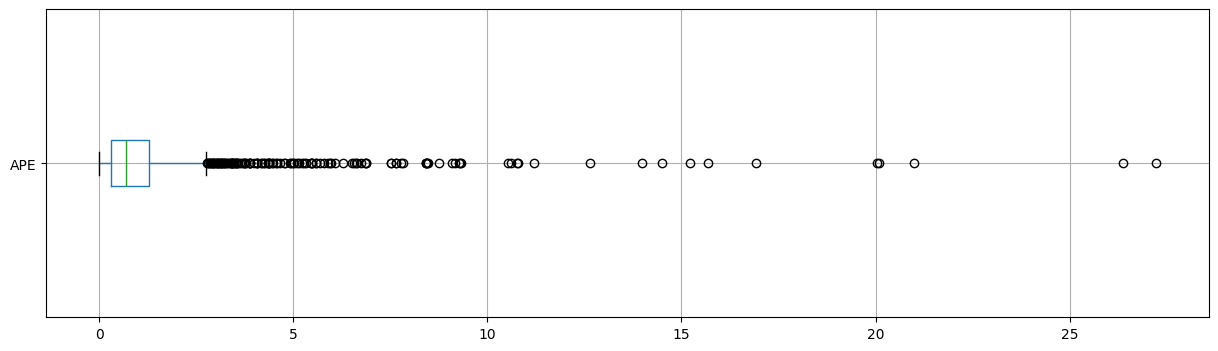

In [221]:
# Looking at the boxplot of APE to see the distribution of errors
TestingDataResults.boxplot(column='APE',figsize=(15,4), vert=False)
plt.show()

In [222]:
remove_data=TestingDataResults[TestingDataResults['APE']>10].index.tolist()
len(remove_data)

16

In [223]:
data_1=data.drop(remove_data).reset_index(drop=True)

In [224]:
# Separate Target Variable and Predictor Variables
TargetVariable='views'
Predictors=['comments', 'dislikes', 'videosRemovedFromPlaylists', 
       'averageViewDuration', 'averageViewPercentage', 'cardClickRate',
       'cardTeaserClickRate', 'cardImpressions', 'cardTeaserImpressions',
       'cardClicks', 'cardTeaserClicks', 'subscribersLost', 'day_name', 'month_name']
X=data_1[Predictors]
y=data_1[TargetVariable].values

In [225]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 120,
 'subsample': 0.8}

In [226]:
Modified_xgb=XGBRegressor(random_state=42, colsample_bytree=0.8,learning_rate=0.05,max_depth=6,n_estimators=120,subsample=0.8)
Modified_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [227]:
# predicted on test data
y_pred = Modified_xgb.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, Modified_xgb.predict(X_train)))
print('Adjusted R2 Value:',1-(1-metrics.r2_score(y_train, Modified_xgb.predict(X_train)))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))
# r2_score helps us find if the model prediction trend and actual trend is same

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.where(y_test != 0,np.abs((y_test - y_pred) / y_test),np.abs(y_test - y_pred))) * 100))

# MSE in metrics - Root mean squared error
print('MSE on Test Data:',np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

R2 Value: 0.9956236248837594
Adjusted R2 Value: 0.995455302763904
Accuracy on Test Data: 97.72872422536548
MSE on Test Data: 0.2540404997818635


In [228]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted

,Actual,Predicted
0,9.341807,9.397645
1,9.156201,9.284720
2,9.459464,9.407234
3,9.515101,9.448064
4,9.612935,9.533655
...,...,...
374,9.256460,9.424435
375,4.007333,4.298379
376,9.329190,9.401853
377,9.480978,9.610500


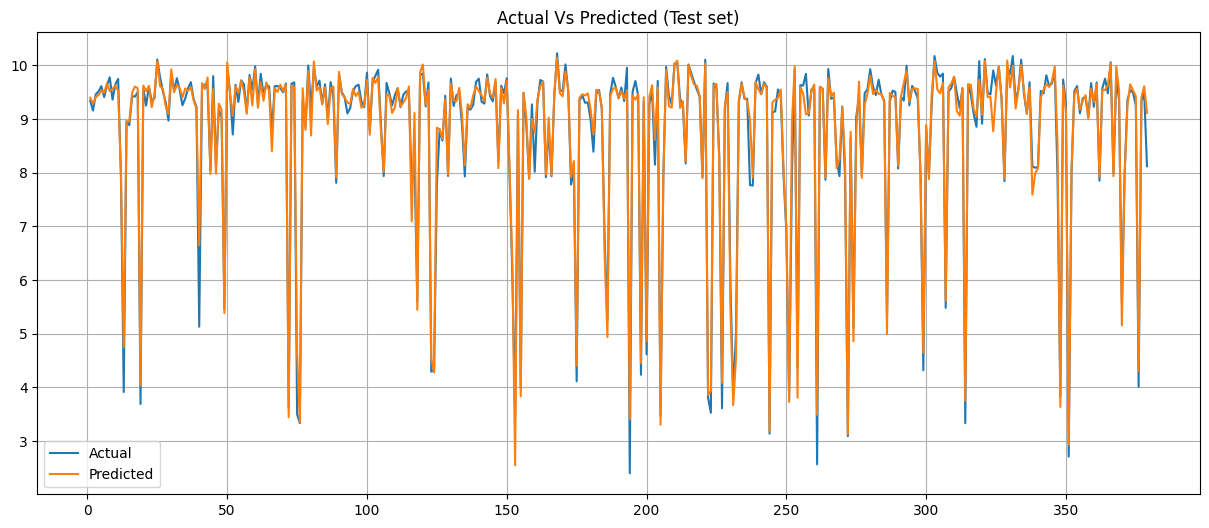

In [229]:
x=np.arange(1,len(y_test)+1)
plt.figure(figsize=(15,6))
plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)